In [1]:
!pip install mysql-connector-python

     ---------------------------------------- 7.9/7.9 MB 22.9 MB/s eta 0:00:00
     ------------------------------------- 904.2/904.2 KB 55.9 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\djban\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [4]:
import mysql.connector
conn = mysql.connector.connect(
    host="localhost",
    database="medical_data",
    user="root",
    password="root",
    port="3306"
)

In [5]:
cur = conn.cursor(dictionary=True)

Check doctor's data

In [6]:
cur.execute('select * from doctors limit 5;')
data = cur.fetchall()
print(data)

[{'doctor_id': 1, 'name': 'Flora Martinez', 'gender': 'Female', 'insurance': 'Yes', 'new_patients': 'Yes', 'speciality_one': 'Diabetes', 'speciality_two': 'Cholesterol', 'speciality_three': 'immunology', 'license': 'MD', 'phone': '8495776489'}, {'doctor_id': 2, 'name': 'Andy James', 'gender': 'Male', 'insurance': 'Yes', 'new_patients': 'No', 'speciality_one': 'Hypertension', 'speciality_two': 'Diabetes', 'speciality_three': 'PTSD', 'license': 'PhD', 'phone': '2340894766'}, {'doctor_id': 3, 'name': 'Hannah Myers', 'gender': 'Female', 'insurance': 'No', 'new_patients': 'Yes', 'speciality_one': 'Diabetes', 'speciality_two': 'Hypertension', 'speciality_three': 'immunology', 'license': 'MD', 'phone': '9907846574'}, {'doctor_id': 4, 'name': 'Jane Huang', 'gender': 'Female', 'insurance': 'Yes', 'new_patients': 'Yes', 'speciality_one': 'Dermatology', 'speciality_two': 'Hypertension', 'speciality_three': 'immunology', 'license': 'MD', 'phone': '4507856797'}, {'doctor_id': 5, 'name': 'April Adam

Check hospital data

In [7]:
cur.execute('select * from hospitals limit 5;')
data = cur.fetchall()
print(data)

[{'hospital_name': 'Van Holsen Community Hospital', 'state': 'CA', 'city': 'San Francisco', 'doctor': 'Flora Martinez'}, {'hospital_name': 'Clear Water Services', 'state': 'CA', 'city': 'San Diego', 'doctor': 'Andy James'}, {'hospital_name': 'Imagery Health', 'state': 'CA', 'city': 'Sacramento', 'doctor': 'Hannah Myers'}, {'hospital_name': 'Blue Cross Clinic', 'state': 'CA', 'city': 'Los Angeles', 'doctor': 'Jane Huang'}, {'hospital_name': 'Blue Cross Clinic', 'state': 'CA', 'city': 'Los Angeles', 'doctor': 'April Adams'}]


* Tables can be joined on doctor's name (not sure how accurate that would be)

In [8]:
# check doctors by gender
cur.execute('select gender, count(1) as count from doctors group by gender order by count desc limit 5;')
data = cur.fetchall()
print(data)

[{'gender': 'Female', 'count': 13}, {'gender': 'Male', 'count': 7}]


In [9]:
# check doctors by gender and license
cur.execute('select gender, license, count(1) as count from doctors group by gender, license order by count desc limit 5;')
data = cur.fetchall()
print(data)

[{'gender': 'Female', 'license': 'MD', 'count': 8}, {'gender': 'Male', 'license': 'PhD', 'count': 4}, {'gender': 'Female', 'license': 'MFT', 'count': 4}, {'gender': 'Male', 'license': 'MD', 'count': 3}, {'gender': 'Female', 'license': 'PhD', 'count': 1}]


In [10]:
# check doctors with insurance
cur.execute('select insurance, count(1) as count from doctors group by insurance order by count desc limit 5;')
data = cur.fetchall()
print(data)

[{'insurance': 'Yes', 'count': 14}, {'insurance': 'No', 'count': 6}]


In [11]:
# check doctors speciality
cur.execute('select speciality_one, count(1) as count from doctors group by speciality_one order by count desc limit 5;')
data = cur.fetchall()
print(data)

[{'speciality_one': 'Hypertension', 'count': 4}, {'speciality_one': 'Diabetes', 'count': 3}, {'speciality_one': 'Dermatology', 'count': 3}, {'speciality_one': 'OCD', 'count': 2}, {'speciality_one': 'ADHD', 'count': 2}]


In [12]:
# check doctors 2nd speciality
cur.execute('select speciality_two, count(1) as count from doctors group by speciality_two order by count desc limit 5;')
data = cur.fetchall()
print(data)

[{'speciality_two': 'Hypertension', 'count': 5}, {'speciality_two': 'immunology', 'count': 4}, {'speciality_two': 'Dermatology', 'count': 3}, {'speciality_two': 'Diabetes', 'count': 2}, {'speciality_two': 'Allergy', 'count': 2}]


In [13]:
# check doctors 2nd speciality
cur.execute('''select speciality_one, speciality_two, speciality_three, count(1) as count from doctors
group by 1, 2, 3 order by count desc limit 5;''')
data = cur.fetchall()
print(data)

[{'speciality_one': 'Hypertension', 'speciality_two': 'Allergy', 'speciality_three': 'OCD', 'count': 1}, {'speciality_one': 'PTSD', 'speciality_two': 'immunology', 'speciality_three': 'Dermatology', 'count': 1}, {'speciality_one': 'Autism', 'speciality_two': 'ADHD', 'speciality_three': 'OCD', 'count': 1}, {'speciality_one': 'Dermatology', 'speciality_two': 'Hypertension', 'speciality_three': 'immunology', 'count': 1}, {'speciality_one': 'Hypertension', 'speciality_two': 'Dermatology', 'speciality_three': 'ADHD', 'count': 1}]


In [14]:
# check hospital data
cur.execute('''select state, city, count(1) as count from hospitals group by 1,2 order by count desc limit 5;''')
data = cur.fetchall()
print(data)

[{'state': 'CA', 'city': 'Sacramento', 'count': 4}, {'state': 'CA', 'city': 'San Francisco', 'count': 3}, {'state': 'CA', 'city': 'San Jose', 'count': 3}, {'state': 'CA', 'city': 'Santa Barbara', 'count': 3}, {'state': 'CA', 'city': 'Los Angeles', 'count': 2}]


In [15]:
# join data
cur.execute('''select d.name, d.gender, d.license, h.state, h.city
from doctors d left join hospitals h on lower(d.name) = lower(h.doctor) limit 5;''')
data = cur.fetchall()
print(data)

[{'name': 'Flora Martinez', 'gender': 'Female', 'license': 'MD', 'state': 'CA', 'city': 'San Francisco'}, {'name': 'Andy James', 'gender': 'Male', 'license': 'PhD', 'state': 'CA', 'city': 'San Diego'}, {'name': 'Hannah Myers', 'gender': 'Female', 'license': 'MD', 'state': 'CA', 'city': 'Sacramento'}, {'name': 'Jane Huang', 'gender': 'Female', 'license': 'MD', 'state': 'CA', 'city': 'Los Angeles'}, {'name': 'April Adams', 'gender': 'Female', 'license': 'MFT', 'state': 'CA', 'city': 'Los Angeles'}]


In [16]:
# see if any doctors not in hospitals table
cur.execute('''select d.name, d.gender, d.license, h.state, h.city
from doctors d left join hospitals h on lower(d.name) = lower(h.doctor)  where  h.state is null limit 5;''')
data = cur.fetchall()
print(data)

[]


# Visualization

<AxesSubplot: xlabel='city'>

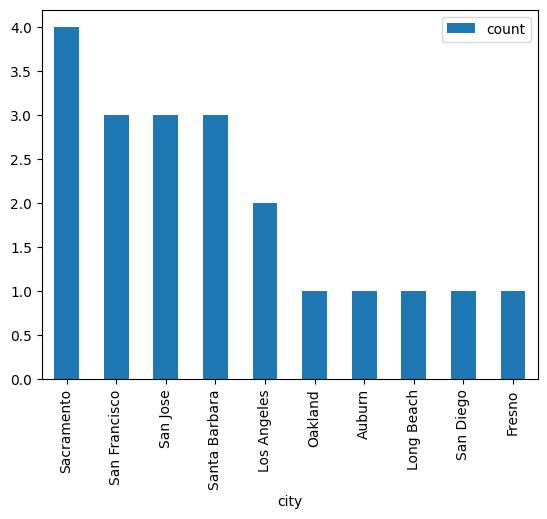

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
cur.execute('''select state, city, count(1) as count from hospitals group by 1,2 order by count desc;''')
data = cur.fetchall()

df = pd.DataFrame(data)
df.columns = ['state', 'city', 'count']
df.plot.bar(x='city', y='count')

<AxesSubplot: xlabel='speciality_two'>

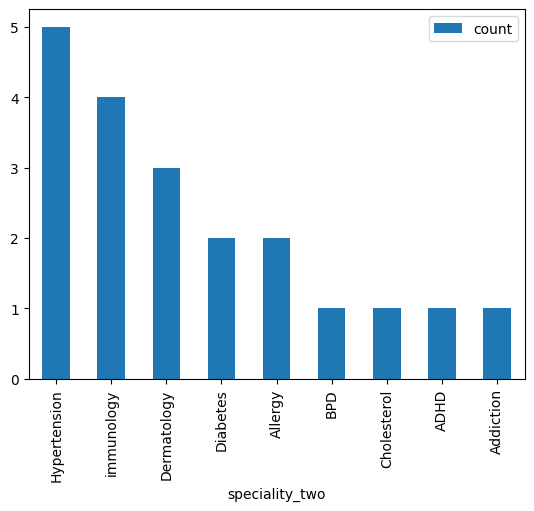

In [27]:
cur.execute('''select speciality_two, count(1) as count from doctors group by speciality_two order by count desc;''')
data = cur.fetchall()

df = pd.DataFrame(data)
df.columns = ['speciality_two', 'count']
df.plot.bar(x='speciality_two', y='count')

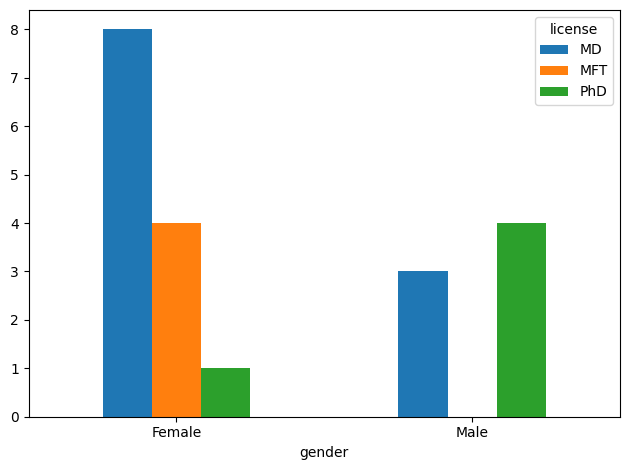

In [30]:
cur.execute('''select gender, license, count(1) as count from doctors group by gender, license order by count desc;''')
data = cur.fetchall()

df = pd.DataFrame(data)
df.columns = ['gender', 'license', 'count']
df.pivot(index='gender', columns='license', values='count').plot(kind='bar', rot=0)
plt.tight_layout()
plt.show()